In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Retrieval 

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x105cd85b0>)

In [3]:
df = pd.read_csv("medical.csv")

In [4]:
print(df.head(),'\n')
print("shape of data", df.shape, '\n')
print(df.info() ,'\n')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

shape of data (1338, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 



In [5]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


 charges is Skewed Data and spread to right 

## EDA and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between `charges` and other columns.

In [6]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [7]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Min is 18 and max is 64 , so 64-18+1 = 47 one for each age group it gives count

In [8]:
px.histogram(df, 
            x='age', 
            marginal='box', #this will plot Box plot
            nbins=47, 
            title='Age Distribution').update_layout(bargap = 0.1)



Age of 18, 19 is twise as other ages and uniform distribution is found,   reason might be less premium rate offering 

In [14]:
fig = px.histogram(df, 
            x='bmi', 
            marginal='box', #this will plot Box plot
            color_discrete_sequence=['red'],
            title='BMI Distribution')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
fig = px.histogram(df, 
            x='charges', 
            marginal='box', #this will plot Box plot
            color='smoker',
            color_discrete_sequence=['green', 'grey'],
            title='charges Distribution')
fig.update_layout(bargap = 0.1)
fig.show()

In [19]:
fig = px.histogram(df, 
            x='charges', 
            marginal='box', #this will plot Box plot
            color='sex',
            color_discrete_sequence=['blue', 'grey'],
            title='charges Distribution')
fig.update_layout(bargap = 0.1)
fig.show()

In [22]:
fig = px.histogram(df, 
            x='charges', 
            marginal='box', #this will plot Box plot
            color='region',
            color_discrete_sequence=['blue', 'red','green', 'wheat'],
            title='charges Distribution')
fig.update_layout(bargap = 0.1)
fig.show()

In [23]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [26]:
fig = px.histogram(df, 
            x='smoker', 
            color='sex',
       
            title='Somkers Distribution')
fig.update_layout(bargap = 0.1)
fig.show()

In [30]:
fig = px.scatter(df , 
                 x = 'age',
                 y = 'charges',
                 color='smoker',
                 opacity=0.8,
                 title = 'Age vs Charges ',
                 hover_data='sex'
                 )
fig.show()

In [33]:
fig = px.scatter(df , 
                 x = 'bmi',
                 y = 'charges',
                 color='smoker',
                 opacity=0.8,
                 title = 'BMI. vs Charges ',
                 hover_data='sex'
                 )
fig.update_traces(marker_size = 5)
fig.show()

In [35]:
fig = px.violin(df , 
                 x = 'sex',
                 y = 'charges',
                 color='smoker',
           
                 title = 'SEX vs Charges ',
                
                 )
fig.update_traces(marker_size = 5)
fig.show()

In [39]:
fig = px.violin(df , 
                 x = 'children',
                 y = 'charges',
               
           
                 title = 'Children vs Charges ',
                
                 )
fig.show()

In [43]:
print(df.charges.corr(df.age))
print(df.charges.corr(df.bmi))
print(df.charges.corr(df.children))

0.2990081933306478
0.19834096883362887
0.06799822684790487


In [50]:
smoker_values = {'no' : 0, 'yes': 1}
smoker_numeric =  df.smoker.map(smoker_values)

In [51]:
df.charges.corr(smoker_numeric)

0.7872514304984778

Text(0.5, 1.0, 'correlation_matrix')

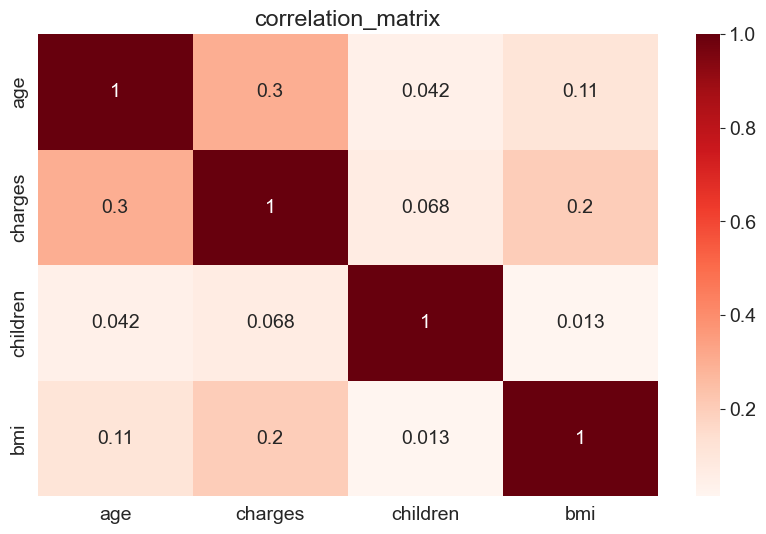

In [62]:
sns.heatmap(df[['age','charges','children','bmi']].corr() , cmap = 'Reds', annot=True)
plt.title("correlation_matrix")

,age,charges,children,bmi
age,1.000000,0.299008,0.042469,0.109272
charges,0.299008,1.000000,0.067998,0.198341
children,0.042469,0.067998,1.000000,0.012759
bmi,0.109272,0.198341,0.012759,1.000000


In [68]:
non_smokerDf = df[df.smoker=='no']
print(non_smokerDf)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


In [71]:
fig = px.scatter(non_smokerDf , 
                 x = 'age',
                 y = 'charges',
                
                 opacity=0.8,
                 title = 'Age vs Charges ',
                 hover_data='sex'
                 )
fig.show()

In [72]:
def estimates_charges(w, age, b):
    return w*age + b

In [125]:
w,b = 250,150

charges_pred = estimates_charges(w, non_smokerDf.age, b)

In [126]:
charges_pred

1        4650
2        7150
3        8400
4        8150
5        7900
        ...  
1332    13150
1333    12650
1334     4650
1335     4650
1336     5400
Name: age, Length: 1064, dtype: int64

In [127]:
estimates_charges(w, 40, b)

10150

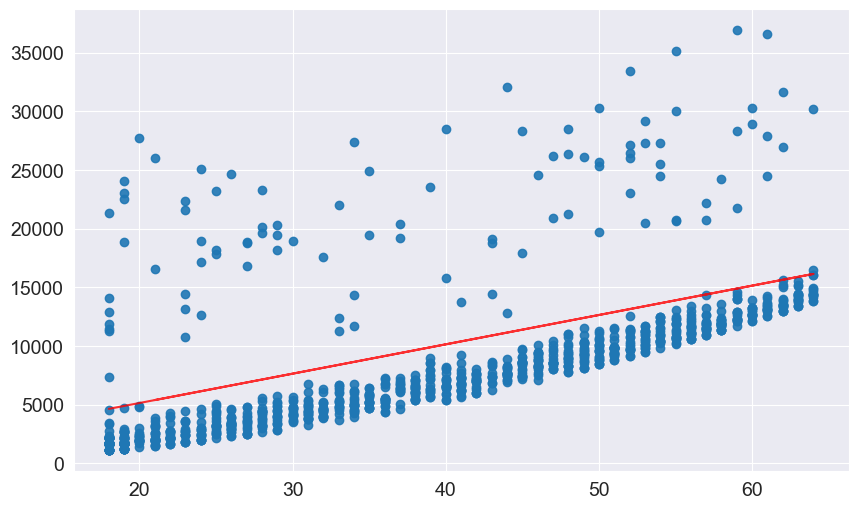

In [128]:


plt.scatter( x = non_smokerDf['age'],
             y = non_smokerDf['charges'],
             alpha=0.9
                 )
plt.plot( non_smokerDf.age ,charges_pred ,'r', alpha=0.8)
plt.title = 'Age vs Charges ',


USE of `lossFunction` to get W,B values to set the Model Parameter 